In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os

In [2]:
#Setting standard picture size
Image_Width=128
Image_Height=128
Image_Size=(Image_Width,Image_Height)
Image_Channels=3

In [3]:
#Preapare dataset for training model
#if you want to test it must change the file path
filenames=os.listdir(r"C:\Users\rover\OneDrive\Escritorio\Computer_Vision\cats-or-dogs\train")
categories=[]
for f_name in filenames:
    category=f_name.split('.')[0]
    if category=='dog':
        categories.append(1)
    else:
        categories.append(0)
df=pd.DataFrame({
    'filename':filenames,
    'category':categories
})

In [4]:
#Creating the model
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,\
     Dropout,Flatten,Dense,Activation,\
     BatchNormalization
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(Image_Width,Image_Height,Image_Channels)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2,activation='softmax'))

model.compile(loss='categorical_crossentropy',
  optimizer='rmsprop',metrics=['accuracy'])

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 126, 126, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 61, 61, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0

In [6]:
#Creating callbacks
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
earlystop = EarlyStopping(patience = 10)
learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_accuracy',patience = 2,verbose = 1,factor = 0.5,min_lr = 0.00001)
callbacks = [earlystop,learning_rate_reduction]

In [7]:

df["category"] = df["category"].replace({0:'cat',1:'dog'})
train_df,validate_df = train_test_split(df,test_size=0.20,
  random_state=42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)
total_train=train_df.shape[0]
total_validate=validate_df.shape[0]
batch_size=15

In [8]:
#Training and validation data generator
#And data augmentation
train_datagen = ImageDataGenerator(rotation_range=15,
                                rescale=1./255,
                                shear_range=0.1,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                width_shift_range=0.1,
                                height_shift_range=0.1
                                )
train_generator = train_datagen.flow_from_dataframe(train_df,
                                                 r"C:\Users\rover\OneDrive\Escritorio\Computer_Vision\cats-or-dogs\train",
                                                 x_col='filename',
                                                 y_col='category',
                                                 target_size=Image_Size,
                                                 class_mode='categorical',
                                                 batch_size=batch_size)
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
     r"C:\Users\rover\OneDrive\Escritorio\Computer_Vision\cats-or-dogs\train", 
    x_col='filename',
    y_col='category',
    target_size=Image_Size,
    class_mode='categorical',
    batch_size=batch_size
)

Found 16669 validated image filenames belonging to 2 classes.
Found 4168 validated image filenames belonging to 2 classes.


In [9]:
#Training model
epochs=10
history = model.fit(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks
)

Epoch 1/10
1111/1111 [==============================] - 69s 53ms/step - loss: 0.7805 - accuracy: 0.6216 - val_loss: 0.6092 - val_accuracy: 0.6946
Epoch 2/10
1111/1111 [==============================] - 50s 45ms/step - loss: 0.5602 - accuracy: 0.7173 - val_loss: 0.4778 - val_accuracy: 0.7637
Epoch 3/10
1111/1111 [==============================] - 53s 48ms/step - loss: 0.5016 - accuracy: 0.7589 - val_loss: 0.7666 - val_accuracy: 0.7430
Epoch 4/10
1111/1111 [==============================] - 51s 46ms/step - loss: 0.4648 - accuracy: 0.7860 - val_loss: 0.4069 - val_accuracy: 0.8166
Epoch 5/10
1111/1111 [==============================] - 50s 45ms/step - loss: 0.4359 - accuracy: 0.8058 - val_loss: 0.3954 - val_accuracy: 0.8229
Epoch 6/10
1111/1111 [==============================] - 50s 45ms/step - loss: 0.4235 - accuracy: 0.8080 - val_loss: 0.3527 - val_accuracy: 0.8561
Epoch 7/10
1111/1111 [==============================] - 51s 46ms/step - loss: 0.3974 - accuracy: 0.8227 - val_loss: 0.3338 -

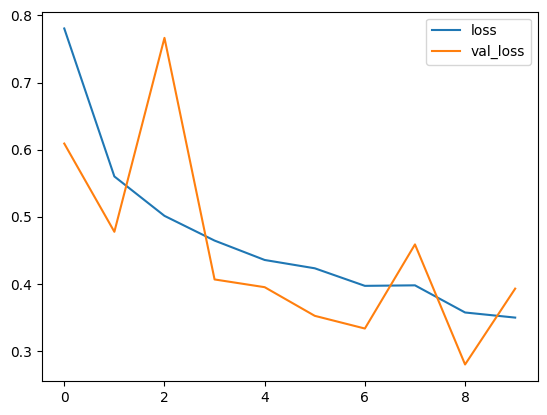

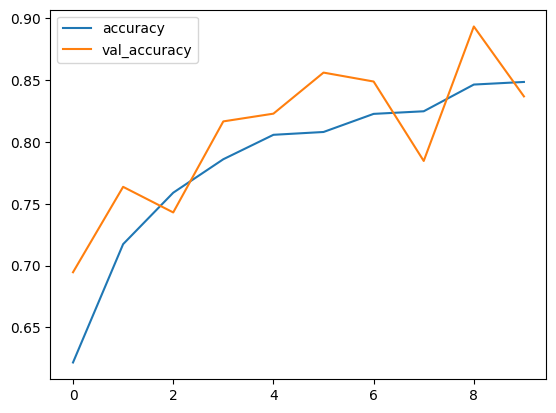

In [10]:
#Checking the model's results
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['accuracy', 'val_accuracy']].plot();

In [11]:
model.save("model1_catsVSdogs_10epoch.h5")

In [12]:
#Test data preparation
test_filenames = os.listdir(r"C:\Users\rover\OneDrive\Escritorio\Computer_Vision\cats-or-dogs\test1")
test_df = pd.DataFrame({
    'filename': test_filenames
})
nb_samples = test_df.shape[0]

test_generator = train_datagen.flow_from_dataframe(test_df,
                                                 r"C:\Users\rover\OneDrive\Escritorio\Computer_Vision\cats-or-dogs\test1",
                                                 x_col='filename',
                                                 target_size=Image_Size,
                                                 class_mode=None,
                                                 batch_size=batch_size)

Found 12500 validated image filenames.


In [17]:
#Predicting categories
predict = model.predict(test_generator, steps=np.ceil(nb_samples/batch_size))

In [19]:
test_df['category'] = np.argmax(predict, axis=-1)
label_map = dict((v,k) for k,v in train_generator.class_indices.items())
test_df['category'] = test_df['category'].replace(label_map)
test_df['category'] = test_df['category'].replace({ 'dog': 1, 'cat': 0 })

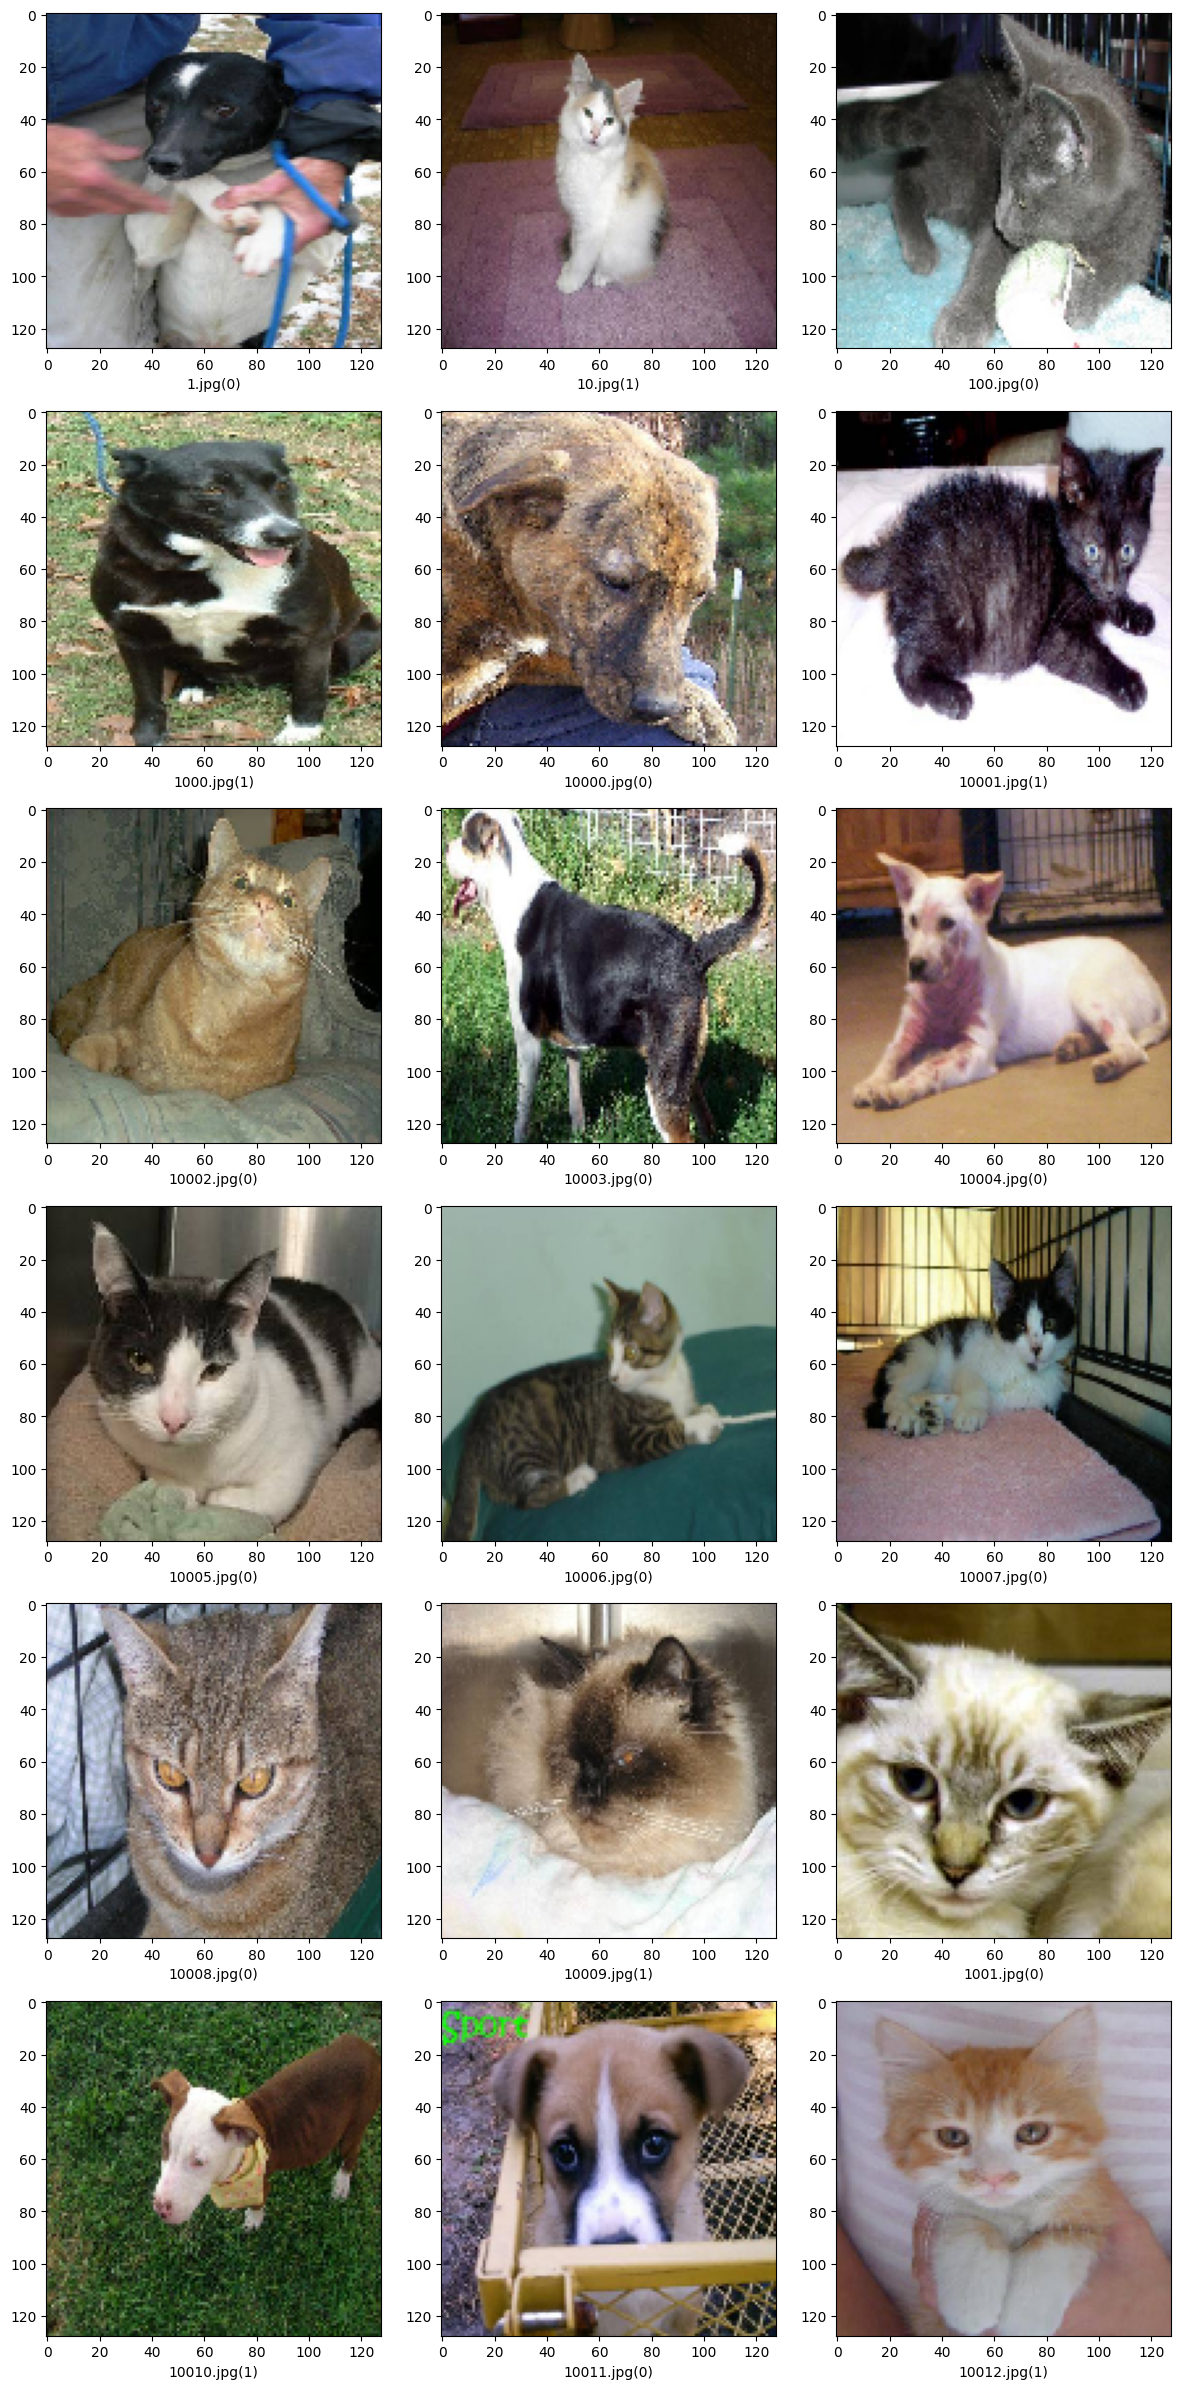

In [27]:
#Vizualize the prediction result
sample_test = test_df.head(18)
sample_test.head()
plt.figure(figsize=(12, 24))
for index, row in sample_test.iterrows():
    filename = row['filename']
    category = row['category']
    img = load_img("C:/Users/rover/OneDrive/Escritorio/Computer_Vision/cats-or-dogs/test1/"+filename, target_size=Image_Size)
    plt.subplot(6, 3, index+1)
    plt.imshow(img)
    plt.xlabel(filename + '(' + "{}".format(category) + ')' )
plt.tight_layout()
plt.show()

In [37]:
# For the chosen image, the output of this cell is the prediction "1 dog" or "0 cat"
results={
    0:'cat',
    1:'dog'
}
from PIL import Image
import numpy as np
im=Image.open("C:/Users/rover/OneDrive/Escritorio/Computer_Vision/cats-or-dogs/test1/10011.jpg")
im=im.resize(Image_Size)
im=np.expand_dims(im,axis=0)
im=np.array(im)
im=im/255
predictions = model.predict(im)
pred=np.argmax(predictions, axis=1)[0]
print(pred,results[pred])

1 dog
